In [14]:
import pandas as pd
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras import layers, models, callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

In [15]:
folder_path = r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\Data train\All_train_files"
all_data = []
labels = []
LABELS = [ 'Ammonia','Benzene','H2S','Sulfur','Ozone','Toluene','Xylene','Regular','noise']  # Add more gas names as needed




In [16]:
# Load and concatenate all CSV files into one DataFrame
labels = []
all_data = []
inconsistent_data_count = 0  # Counter for inconsistent data entries

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        print(f"Processing file: {filename}, shape: {df.shape}")

                # Drop completely blank rows and columns
        df.dropna(how='all', axis=0, inplace=True)  # Drop blank rows
        df.dropna(how='all', axis=1, inplace=True)  # Drop blank columns


        # Determine the gas type based on the filename
        gas_type = None
        for i, gas in enumerate(LABELS):
            if gas in filename:
                gas_type = i
                break

        if gas_type is not None:
            # Check if the file has one column or multiple columns
            if df.shape[1] < 3:
                # Single column file: add the entire column as one example
                if len(df) == 311:
                    all_data.append(df.iloc[:, 0].values.tolist())
                    labels.append(gas_type)
                else:
                    print(f"Skipping file {filename} due to incorrect length: {len(df)}")
            else:  # Multiple columns file
                for row_idx, row in df.iterrows():
                    if len(row) == 311:
                        all_data.append(row.tolist())
                        labels.append(gas_type)
                        print(f"Processed row {row_idx + 1} in multi-column file: {filename}")
                    else:
                        print(f"Skipping row {row_idx + 1} in {filename} due to incorrect length: {len(row)}")
                        inconsistent_data_count += 1

# Check all data entries for consistent length
if all(len(d) == 311 for d in all_data):
    X = np.array(all_data)
    y = np.array(labels)
    print("Data consistency check passed.")
else:
    print("Data consistency check failed. There are inconsistent entries.")

print(f"Total inconsistent data entries: {inconsistent_data_count}")

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Output shapes
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Processing file: Ammonia_1000_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_100_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_1010_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_10_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_110_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_120_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_130_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_140_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_150_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_160_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_170_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_180_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_190_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_200_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_20_ppm_meter_noisy.csv, shape: (311, 1)
Processing

In [4]:



model = models.Sequential([
    layers.Dense(250, activation='tanh', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),  # Slightly lower dropout
    layers.Dense(180, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(100, activation='tanh'),
    layers.Dense(50, activation='tanh'),
    layers.Dropout(0.1),  # Slightly lower dropout
    layers.Dense(20, activation='tanh'),
    layers.Dense(len(LABELS), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\thaim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 250)            │        78,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 180)            │        45,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        18,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │           189 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,539 (576.32 KB)

 Trainable params: 147,539 (576.32 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6928 - loss: 0.9610 - val_accuracy: 0.9157 - val_loss: 0.3113 - learning_rate: 0.0010
Epoch 2/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9131 - loss: 0.2931 - val_accuracy: 0.9432 - val_loss: 0.2089 - learning_rate: 0.0010
Epoch 3/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9247 - loss: 0.2344 - val_accuracy: 0.9360 - val_loss: 0.2219 - learning_rate: 0.0010
Epoch 4/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9416 - loss: 0.1943 - val_accuracy: 0.9583 - val_loss: 0.1451 - learning_rate: 0.0010
Epoch 5/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9430 - loss: 0.1666 - val_accuracy: 0.9664 - val_loss: 0.1273 - learning_rate: 0.0010
Epoch 6/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9505 - loss: 0.1588 - val_accuracy: 0.9666 - val_loss: 0.1124 - learning_rate: 0.0010
Epoch 7/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9558 - loss: 0.1453 - 

In [6]:
model.evaluate(X_test, y_test)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9901 - loss: 0.0308


[0.02945423126220703, 0.9909849166870117]

In [17]:
weights_folder = r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\General_Codes\Gas_detector\model_weights\model_tanh_250-9_dropout-02_LR-0001.weights.h5"
model.load_weights(weights_folder)

In [26]:
model2 = models.Sequential([
    layers.Dense(250, activation='tanh', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),  # Slightly lower dropout
    layers.Dense(180, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(100, activation='tanh'),
    layers.Dense(50, activation='tanh'),
    layers.Dropout(0.1),  # Slightly lower dropout
    layers.Dense(20, activation='tanh'),
    layers.Dense(len(LABELS))
])

model2.summary()

C:\Users\thaim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 250)            │        78,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 180)            │        45,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        18,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │           189 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,539 (576.32 KB)

 Trainable params: 147,539 (576.32 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model2.load_weights(weights_folder)

In [109]:
# Read the X_axis values from a CSV file and creating reference vector variable of the spectrum needed
predict_test = pd.read_csv(r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\General_Codes\Gas_Detector_5_24\Records\TEST-mix_for_model.csv", header=None)
vector_predict_test = predict_test.iloc[0, :].values  # numpy array of values

predict_test2 = pd.read_csv(r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\General_Codes\Gas_Detector_5_24\Records\TEST-only_H2S.csv", header=None)
vector_predict_test2 = predict_test2.iloc[0, :].values  # numpy array of values


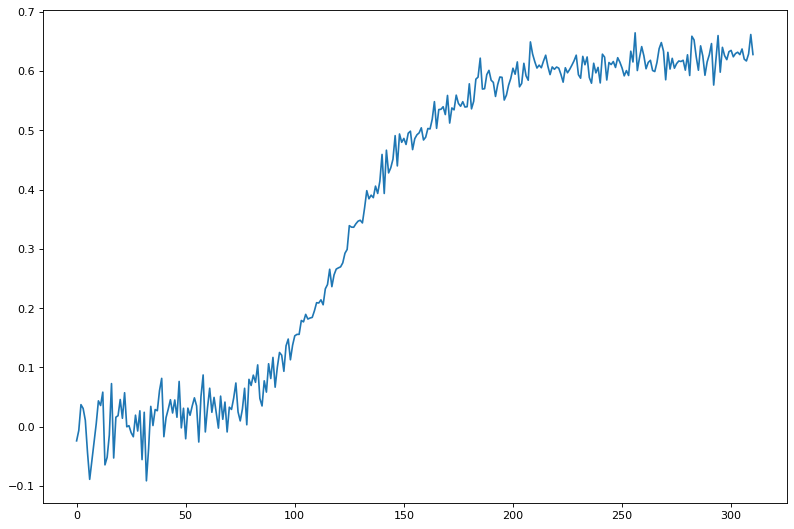

In [113]:
TEST=(vector_predict_test)
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(TEST)


In [114]:
TEST=np.expand_dims(TEST, axis=0)
TEST.shape

(1, 311)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


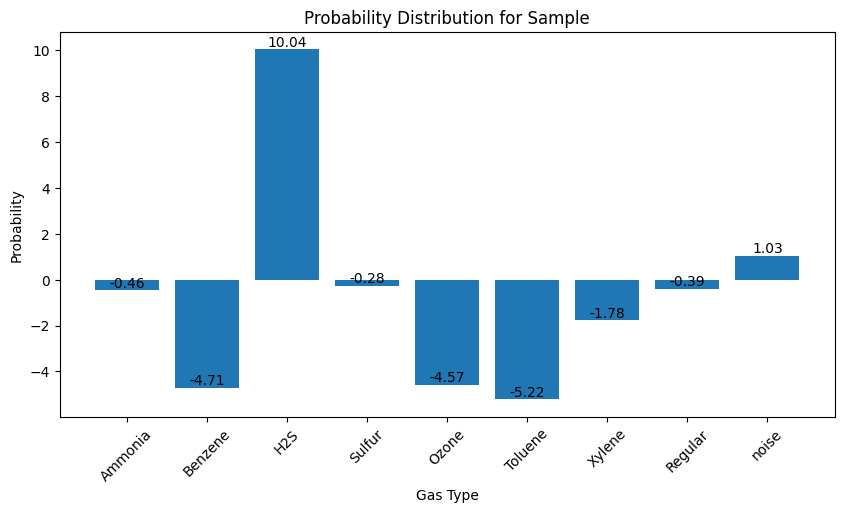

In [117]:
# Perform inference to get predicted probabilities
probabilities = model2.predict(TEST)

# Extracting probabilities for a specific sample (e.g., the first sample in the test set)
sample_index = 0
sample_probabilities = probabilities[sample_index]

# Plotting the probability distribution with numerical labels
plt.figure(figsize=(10, 5))
bars = plt.bar(LABELS, sample_probabilities)
plt.xlabel('Gas Type')
plt.ylabel('Probability')
plt.title('Probability Distribution for Sample')
plt.xticks(rotation=45)

# Adding numerical labels to the bars
for bar, prob in zip(bars, sample_probabilities):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{prob:.2f}', ha='center', va='bottom')

plt.show()

In [7]:
# weights_folder = r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\General_Codes\Gas_detector\model_weights\model_tanh_250-9_dropout-02_LR-0001.weights.h5"

# # model.save_weights('model_tanh_250-9_dropout-02_LR-0001.weights.h5')
# model.save_weights(weights_folder)

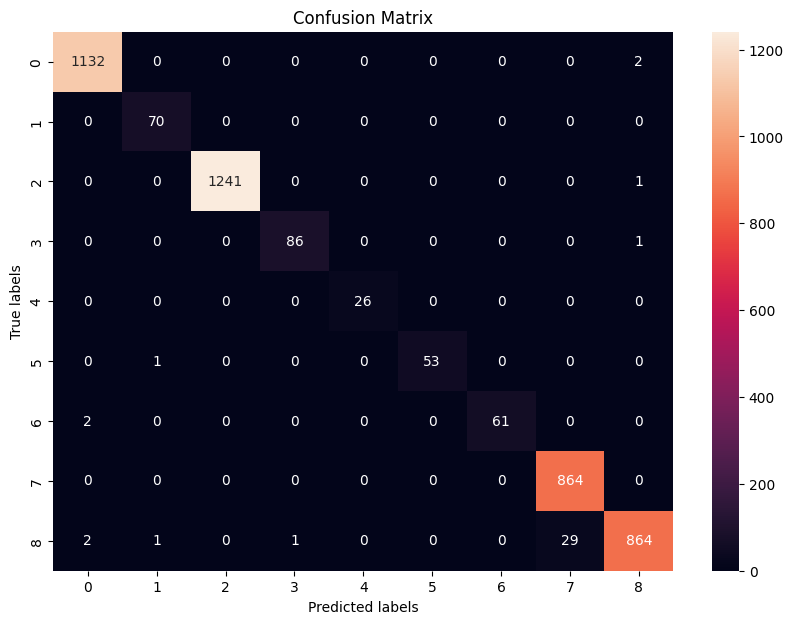

In [8]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics

Aset = X_test
Bset = y_test

# Use a suitable batch size
batch_size = 32  # Adjust as needed based on your system's memory capacity

output = []
for i in range(0, len(Aset), batch_size):
    batch = Aset[i:i+batch_size]
    predictions = model.predict(batch, verbose=0)
    predicted_labels = np.argmax(predictions, axis=1)
    output.extend(predicted_labels)

output = np.array(output)

# Compute the confusion matrix
cm = metrics.confusion_matrix(Bset, output)
df_cm = pd.DataFrame(cm, range(np.max(Bset) + 1), range(np.max(Bset) + 1))

# Display the confusion matrix using seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, fmt='g')  # Annotate cells with numbers
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [9]:
X_test[1,:]

array([0.05743792, 0.07899253, 0.06948094, 0.06163487, 0.0710701 ,
       0.06544946, 0.05161638, 0.06897995, 0.0520735 , 0.07343542,
       0.06188754, 0.05811287, 0.06283215, 0.07467301, 0.05424856,
       0.05734757, 0.05979997, 0.04983308, 0.05098472, 0.0588312 ,
       0.04642188, 0.04557062, 0.06360718, 0.05857778, 0.06104787,
       0.06368818, 0.05391387, 0.04954725, 0.04970699, 0.06021743,
       0.04541085, 0.04929374, 0.05284195, 0.06078545, 0.06122325,
       0.05716373, 0.04447198, 0.04479379, 0.0512812 , 0.06209483,
       0.05394178, 0.06244015, 0.05694852, 0.05946033, 0.0533815 ,
       0.05244143, 0.06080347, 0.051548  , 0.0630385 , 0.06840739,
       0.05497276, 0.05562386, 0.06125674, 0.05007626, 0.06309716,
       0.06305466, 0.05778655, 0.07422646, 0.05979893, 0.06694603,
       0.06809185, 0.06684088, 0.06455554, 0.07396184, 0.08021911,
       0.06155698, 0.07659306, 0.08573686, 0.07518435, 0.0636262 ,
       0.07118929, 0.07526084, 0.06732994, 0.06973877, 0.06958

Test


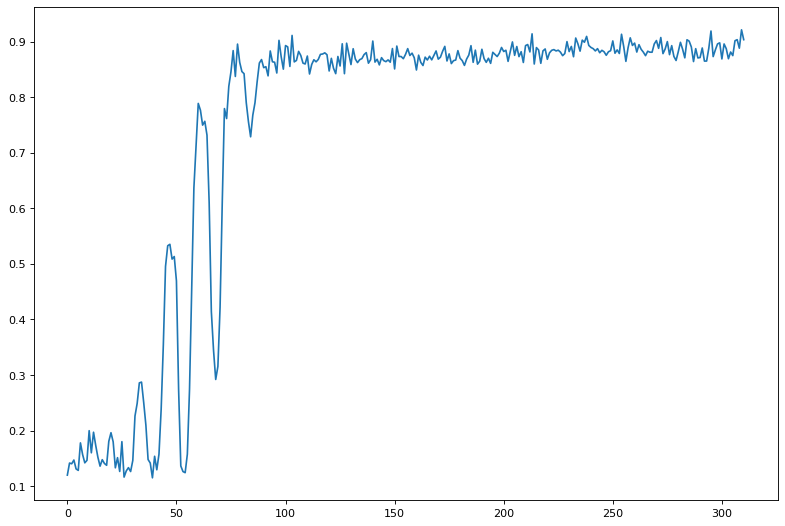

In [10]:
path=r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas cells check\Amonia 6000\05_03.xlsx"

xsls_files = pd.read_excel(path)
t=np.array(xsls_files)
test_input=(t[3,647:958]/100).astype('float32')
#
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_input)



In [11]:
index=10
#X_test[index,:]
input1=np.expand_dims(test_input, axis=0)
output=model.predict(input1)
output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[9.9887484e-01, 7.8800767e-05, 1.3658649e-04, 1.7810876e-04,
        7.8630698e-08, 5.1217841e-04, 8.2388360e-05, 3.9870814e-05,
        9.7098404e-05]], dtype=float32)

In [12]:
LABELS[np.argmax(output)]

'Ammonia'

In [13]:
LABELS[y_test[index]]

'Ozone'